# **Avance 4. Modelos alternativos**

Objetivos:

- 3.3 Explorar una gama diversa de técnicas y enfoques con el fin de identificar el de mejor desempeño en el conjunto de datos en cuestión.

- 3.4 Encontrar la configuración óptima que maximiza el rendimiento del modelo en una tarea específica.


###**Equipo 25**


### Estudiantes


* A01793899 - Andrés Julián López Hurtado
* A01793999 - Nathalia Milena Prada Hernández
* A01794404 - Victor Alejandro Regueira Romero

Fecha: 20 de octubre de 2024

# Instrucciones

Este avance implica construir múltiples modelos (individuales, no ensambles) relevantes para resolver el problema y evaluar su desempeño. Diferentes algoritmos pueden comportarse de manera óptima en diferentes tipos de datos o tareas. La construcción de modelos alternativos permite explorar y evaluar cuál de ellos proporciona el mejor rendimiento para un problema particular.

Además, los modelos se pueden ajustar para determinar si se puede mejorar su rendimiento. Diferentes configuraciones de hiperparámetros pueden afectar significativamente el rendimiento de un modelo. Construir modelos alternativos implica explorar y ajustar estos hiperparámetros para encontrar la configuración óptima.

Las siguientes son acciones que deberás abordar en este avance:

- Construir al menos 6 modelos diferentes (individuales, no ensambles), utilizando algoritmos variados.
- Comparar el rendimiento de los modelos obtenidos.
- Seleccionar los dos modelos que proporcionen el mejor rendimiento.
- Ajustar los dos mejores modelos.
- Elegir el modelo individual final.

# Importar Drive

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librerías

In [239]:
#Importando las librerías que necesitamos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns   # para un mejor despliegue de los gráficos

#Esta libraría la vamos a usar para hacer la división de datos en datos de entrenamiento y en datos de prueba.
from sklearn.model_selection import train_test_split

#Las siguientes librerías las vamos a usar para crear el pipeline.
from sklearn.pipeline import Pipeline #Esta para armar el pipeline
from sklearn.impute import SimpleImputer #Esta es para simple imputer, sirve para tratamiento de valores nan (missing values)
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler #Esta para hacer el escalado (numércias), onehotencoder (categóricas)
from sklearn.preprocessing import FunctionTransformer #Para variables cuantitativas. La uso en el Pipeline
from sklearn.utils import class_weight
from sklearn.compose import ColumnTransformer #Esta es ya para armar todo el arreglo con las imputaciones, transformaciones y demás del preprocesamiento.

#Las siguientes librerías son los modelos que vamos a entrenar y el método de validación cruzada k-fold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier  # Import the XGBoost classifier
from sklearn import tree  # para el grafico de arbol de decision
from IPython.display import Image

from sklearn.model_selection import RepeatedStratifiedKFold #Método de validación cruzada k-fold
from sklearn.model_selection import cross_validate #Esta función me permite pegar todo lo que se crea: el pipeline, los modelos a entrenar y
                                                    #las métricas que he creado para medición del desempeño.

from sklearn.model_selection import cross_val_score


from sklearn.metrics import classification_report, make_scorer #El método maske_scorer me va a permitir crear un diccionario para juntar todas las
                                                               #métricas de desempeño que se van a definir
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve, validation_curve #Para calcular las curvas de entrenamiento.
from sklearn.model_selection import GridSearchCV #Para calcular el mejor conjunto de hiperparámetros

# Rutas de archivos y carga de la base

In [240]:
#file_tabla_unida = '/content/drive/MyDrive/TECForza/df_union2.csv'
file_tabla_unida = '/content/drive/MyDrive/0-Actual/MNA/proyecto_integrador/df_union2.csv'

In [241]:
df_tabla_unida = pd.read_csv(file_tabla_unida)
df_tabla_unida.head()

,name,date,total_distance_used_sum,total_fuel_used_sum,consumption,performance,distance,idlingDuration,idlingPercent,idlingDuration_hours,...,ExcessiveSpeedingCount,ExcessiveSpeedingDistance,HardAccelerationCount,HardAccelerationDistance,HarshBrakingCount,HarshBrakingDistance,HarshCorneringDuration,HarshCorneringCount,HarshCorneringDistance,MaxSpeed
0,986,2024-07-01,115.575006,15.321976,7.543088,0.132572,30.063228,08:12:02,87.0,8.20,...,159.0,50.848373,133.0,0.057267,1.0,0.000096,0.0,43.0,0.006195,83.885109
1,1038,2024-07-01,167.770170,25.096340,6.685045,0.149588,72.647624,06:53:43,62.0,6.90,...,19.0,2.382248,17.0,0.002865,0.0,0.000000,0.0,28.0,0.002594,76.428658
2,502,2024-07-02,1025.262150,68.948892,8.653096,0.067250,912.121800,11:00:31,46.0,11.01,...,105.5,38.452164,48.0,0.020623,0.5,0.000332,0.0,39.5,0.009367,42.874611
3,532,2024-07-02,1103.554896,75.817364,14.555437,0.068703,554.235964,01:34:01,14.0,1.57,...,3.5,0.055369,77.5,0.065764,0.0,0.000000,0.0,18.5,0.007460,38.835701
4,880,2024-07-02,857.491980,64.193796,13.357864,0.074862,429.840038,20:46:51,73.0,20.78,...,402.0,123.554245,59.0,0.020675,0.0,0.000000,0.0,37.0,0.020335,83.885109


# Variables seleccionadas y datasets

In [242]:
df_tabla_unida.columns

Index(['name', 'date', 'total_distance_used_sum', 'total_fuel_used_sum',
       'consumption', 'performance', 'distance', 'idlingDuration',
       'idlingPercent', 'idlingDuration_hours', 'CurrentFuelPrice',
       'IdlingCost', 'SpeedLimit1Count', 'SpeedLimit2Count',
       'SpeedLimit3Count', 'TotalDrivingDuration', 'AverageSpeed',
       'StopUnder10Count', 'StopOver10Count', 'StopOver20Count',
       'StopOver30Count', 'StopOver40Count', 'StopOver50Count',
       'IdlingOver5Count', 'IdlingDuration', 'AfterHoursTripCount',
       'TotalDistance', 'TotalStopsCount', 'SpeedingDuration', 'SpeedingCount',
       'SpeedingDistance', 'ExcessiveSpeedingDuration',
       'ExcessiveSpeedingCount', 'ExcessiveSpeedingDistance',
       'HardAccelerationCount', 'HardAccelerationDistance',
       'HarshBrakingCount', 'HarshBrakingDistance', 'HarshCorneringDuration',
       'HarshCorneringCount', 'HarshCorneringDistance', 'MaxSpeed'],
      dtype='object')

In [243]:
selected_columns = ['name', 'date', 'consumption', 'IdlingCost', 'SpeedingCount', 'ExcessiveSpeedingCount', 'HardAccelerationCount', 'HarshBrakingCount', 'HarshCorneringCount']
df_selected = df_tabla_unida[selected_columns]

In [244]:
# prompt: Y

# Assuming 'Y' is a DataFrame or Series containing the target variable
Y = df_selected['consumption']

vamos a crear cuatro grupos dependiendo del valor de consumption: S, M, L y XL. Esto para poder crear una variable discreta para el árbol de decisión de tipo clasificación. Los valores umbrales se escogieron para que la cantidad de elementos en cada grupo sea aproximadamente igual y no se cree un problema de desbalaceo en los datos de Y. Los umblares son:

* Grupo S: Rango (0.0392, 7.5566) - Cantidad: 10,759
* Grupo M: Rango (7.5566, 8.5477) - Cantidad: 10,758
* Grupo L: Rango (8.5477, 8.9567) - Cantidad: 10,759
* Grupo XL: Rango (8.9567, 14.8651) - Cantidad: 10,757

In [245]:
# Dividir los datos de Y en 4 grupos de igual tamaño
quantiles = Y.quantile([0.25, 0.5, 0.75])

# Definir los rangos para cada grupo
rango_S = (Y.min()-0.01, quantiles[0.25])
rango_M = (quantiles[0.25], quantiles[0.5])
rango_L = (quantiles[0.5], quantiles[0.75])
rango_XL = (quantiles[0.75], Y.max())

# Contar cuántos datos quedan en cada grupo
grupo_S = Y[(Y >= rango_S[0]) & (Y <= rango_S[1])].count()
grupo_M = Y[(Y > rango_M[0]) & (Y <= rango_M[1])].count()
grupo_L = Y[(Y > rango_L[0]) & (Y <= rango_L[1])].count()
grupo_XL = Y[(Y > rango_XL[0]) & (Y <= rango_XL[1])].count()

# Mostrar los resultados
rangos = {
    "S": {"rango": rango_S, "cantidad": grupo_S},
    "M": {"rango": rango_M, "cantidad": grupo_M},
    "L": {"rango": rango_L, "cantidad": grupo_L},
    "XL": {"rango": rango_XL, "cantidad": grupo_XL}
}



# Crear la variable Y_modificada asignando letras según las reglas de los grupos
Y_modificada = pd.cut(Y,
                      bins=[Y.min()-0.01, quantiles[0.25], quantiles[0.5], quantiles[0.75], Y.max()],
                      labels=['S', 'M', 'L', 'XL'])

# Mostrar las primeras filas de Y_modificada para verificar
print(Y_modificada.head())




0     S
1     S
2     L
3    XL
4    XL
Name: consumption, dtype: category
Categories (4, object): ['S' < 'M' < 'L' < 'XL']


In [246]:
# Drop non-feature columns
features = df_selected.drop(columns=['name', 'date', 'consumption'])
features_v2 = df_tabla_unida[['total_distance_used_sum', 'total_fuel_used_sum',
       'CurrentFuelPrice']]
target = Y_modificada

In [247]:
target.value_counts()

,count
consumption,
S,10759
L,10759
M,10758
XL,10757


Text(0, 0.5, 'Frecuencia')

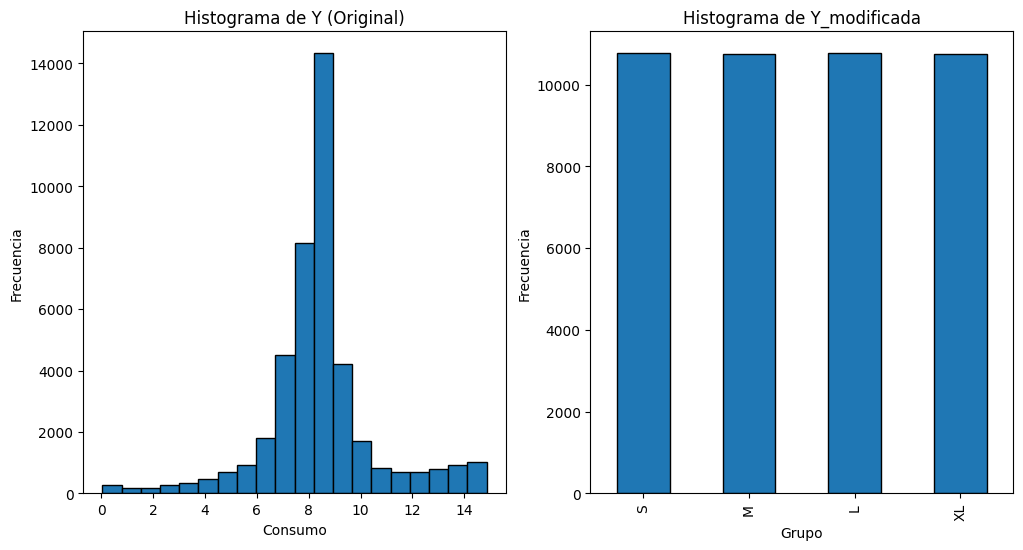

In [248]:
# Crear un grid de 1 fila y 2 columnas para los histogramas de Y y Y_modificada
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de Y (variable original)
axes[0].hist(Y, bins=20, edgecolor='black')
axes[0].set_title('Histograma de Y (Original)')
axes[0].set_xlabel('Consumo')
axes[0].set_ylabel('Frecuencia')

# Histograma de Y_modificada (variable categorizada)
target.value_counts().sort_index().plot(kind='bar', ax=axes[1], edgecolor='black')
axes[1].set_title('Histograma de Y_modificada')
axes[1].set_xlabel('Grupo')
axes[1].set_ylabel('Frecuencia')

In [249]:
features.columns

Index(['IdlingCost', 'SpeedingCount', 'ExcessiveSpeedingCount',
       'HardAccelerationCount', 'HarshBrakingCount', 'HarshCorneringCount'],
      dtype='object')

In [250]:
features_v2.columns

Index(['total_distance_used_sum', 'total_fuel_used_sum', 'CurrentFuelPrice'], dtype='object')

#Moldelo: Predicción de clases basadas en el consumo

Aplicamos los cuantiles para crear una Y_modificada


El histograma de Y_modificada y Y quedaría así:

Para mode

## Obtención de los conjuntos de validación y prueba

A continuación vamos a obtener los datos de validación y prueba. Vamos a pasar los datos de X_train, y posteriormente los de X_test, por un pipeline que prepare los datos de X así:
1. Un escalado de los datos
2. Aplicación de una transformación raíz cúbica para garantizar que los datos tengan una distribución más o menos uniforme.

In [251]:
# We split the data features and target, train 50%, validation 20% and test 30%

X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2857, random_state=42) # 0.2857 * 0.7 = 0.2

In [252]:
features.shape

(43033, 6)

In [253]:
# prompt: print the shape of all the train, validate and test data

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (21516, 6)
Shape of y_train: (21516,)
Shape of X_val: (8607, 6)
Shape of y_val: (8607,)
Shape of X_test: (12910, 6)
Shape of y_test: (12910,)


In [254]:

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    features_v2, target, test_size=0.3, random_state=42
)

print("Shape of X_train_new:", X_train_new.shape)
print("Shape of y_train_new:", y_train_new.shape)
print("Shape of X_test_new:", X_test_new.shape)
print("Shape of y_test_new:", y_test_new.shape)

Shape of X_train_new: (30123, 3)
Shape of y_train_new: (30123,)
Shape of X_test_new: (12910, 3)
Shape of y_test_new: (12910,)


## Pipeline

In [255]:
X_train_new.columns

Index(['total_distance_used_sum', 'total_fuel_used_sum', 'CurrentFuelPrice'], dtype='object')

In [256]:
from sklearn.preprocessing import FunctionTransformer

# Define the cubic root transformation function
def cubic_root_transform(X):
  return np.cbrt(X)

# Create a pipeline for numerical features
numerical_features = ['total_distance_used_sum', 'total_fuel_used_sum',
       'CurrentFuelPrice']
numerical_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('cubic_root', FunctionTransformer(cubic_root_transform)),
])

# Create a ColumnTransformer to apply the pipeline to numerical features
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
])

In [257]:
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('cubic_root',
                                                  FunctionTransformer(func=<function cubic_root_transform at 0x7985f1aae170>))]),
                                 ['total_distance_used_sum',
                                  'total_fuel_used_sum', 'CurrentFuelPrice'])])

In [258]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform y_train
y_train_encoded = le.fit_transform(y_train)

# Transform y_val and y_test using the same encoder
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)


# Fit and transform y_train
y_train_encoded_new = le.fit_transform(y_train_new)

# Transform y_val and y_test using the same encoder
y_val_encoded_new = le.transform(y_val_new)
y_test_encoded_new = le.transform(y_test_new)

## Modelos

In [259]:
def get_models():

    models = list()
    names = list()

    #DT - Árbol de Decisión:
    models.append(DecisionTreeClassifier())
    names.append('Decision Tree')

    #RFC - KNeighbors Classifier
    models.append(KNeighborsClassifier())
    names.append('KNeighbors Classifier')

    # XGBoost Classifier
    models.append(XGBClassifier())
    names.append('XGBoost Classifier')

    return models, names

Definición de las métricas

In [260]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def mi_accuracy(y_real, y_pred):
    return accuracy_score(y_real, y_pred)

def mi_precision(y_real, y_pred):
    return precision_score(y_real, y_pred, average='weighted')  # 'weighted' maneja clases desbalanceadas

def mi_recall(y_real, y_pred):
    return recall_score(y_real, y_pred, average='weighted')

def mi_f1_score(y_real, y_pred):
    return f1_score(y_real, y_pred, average='weighted')

def mi_G_mean(y_real, y_pred):
    conf_matrix = confusion_matrix(y_real, y_pred)
    true_positive_rates = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    g_mean = np.sqrt(np.prod(true_positive_rates))
    return g_mean


## Métricas de los modelos

In [261]:
models, names = get_models()
scores = list()

for i in range(len(models)):

    pipeline = Pipeline(steps=[('ct', preprocessor),('m',models[i])])
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)
    mis_metricas = {
        "Accuracy": make_scorer(mi_accuracy),
        "Precision": make_scorer(mi_precision),
        "Recall": make_scorer(mi_recall),
        "F1_score": make_scorer(mi_f1_score),
        "G_mean": make_scorer(mi_G_mean)
        }

    scores_temp = cross_validate(pipeline, X_train_new, y_train_encoded_new, scoring= mis_metricas, cv=cv)
    scores.append(scores_temp)

    print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (names[i],
                                                                          np.mean(scores_temp['test_Accuracy']),
                                                                          np.std(scores_temp['test_Accuracy']),
                                                                          np.mean(scores_temp['test_Precision']),
                                                                          np.std(scores_temp['test_Precision']),
                                                                          np.mean(scores_temp['test_Recall']),
                                                                          np.std(scores_temp['test_Recall']),
                                                                          np.mean(scores_temp['test_F1_score']),
                                                                          np.std(scores_temp['test_F1_score']),
                                                                          np.mean(scores_temp['test_G_mean']),
                                                                          np.std(scores_temp['test_G_mean'])
                                                                          ))

Decision Tree:
mean Accuracy: 0.953 (0.0031)
mean Precision: 0.953 (0.0031)
mean Recall: 0.953 (0.0031)
mean F1score: 0.953 (0.0031)
Gmean: 0.908 (0.0059)

KNeighbors Classifier:
mean Accuracy: 0.954 (0.0028)
mean Precision: 0.954 (0.0027)
mean Recall: 0.954 (0.0028)
mean F1score: 0.954 (0.0027)
Gmean: 0.910 (0.0052)

XGBoost Classifier:
mean Accuracy: 0.953 (0.0027)
mean Precision: 0.953 (0.0027)
mean Recall: 0.953 (0.0027)
mean F1score: 0.953 (0.0027)
Gmean: 0.908 (0.0051)



## Curvas de aprendizaje

Curvas de aprendizaje para el árbol de decisión.

In [262]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, nombre_score):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')

    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')

    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(nombre_score)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [265]:

def mi_ModeloYCurvas_arbol(Xin, md):
    modelo = DecisionTreeClassifier(max_depth=md)

    mi_pipe = Pipeline(steps=[('ct', preprocessor), ('modelo', modelo)])

    mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

    mis_metricas_2 = make_scorer(mi_f1_score)

    delta_train_sz = np.linspace(0.1, 1.0, 20)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator=mi_pipe,
                                                        X=Xin,
                                                        y=y_train_encoded_new,
                                                        cv=mi_kfold,
                                                        train_sizes=delta_train_sz,
                                                        scoring=mis_metricas_2,
                                                        random_state=11)

    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "F1 Score")

    # Fit the pipeline to get feature importances
    mi_pipe.fit(Xin, y_train_encoded_new)

    # Get feature importances from the XGBoost model
    if hasattr(mi_pipe['modelo'], 'feature_importances_'):
        feature_importances = mi_pipe['modelo'].feature_importances_

        # Print feature importances along with the corresponding column names
        for i, importance in enumerate(feature_importances):
            print(f"Feature {numerical_features[i]}: {importance}")  # Assuming numerical_features is defined earlier

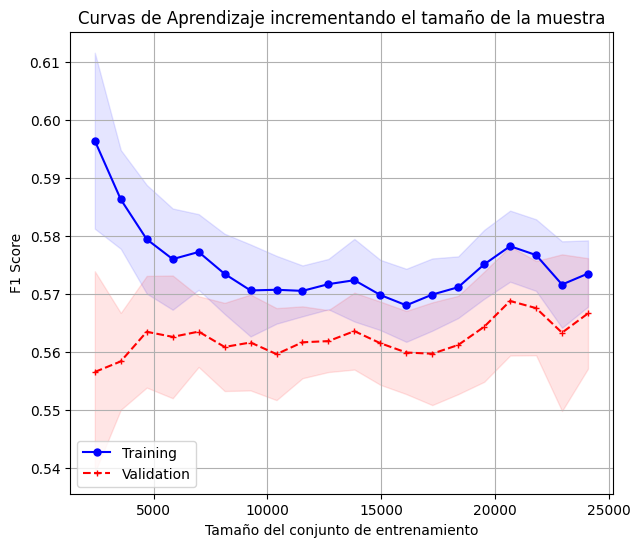

Feature total_distance_used_sum: 0.6039575138388302
Feature total_fuel_used_sum: 0.2483713080970609
Feature CurrentFuelPrice: 0.14767117806410882


In [267]:
mi_ModeloYCurvas_arbol(X_train_new, 5)

## Mejores parámetros

In [275]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'm__learning_rate': [0.01, 0.1, 0.2],
    'm__max_depth': [3, 5, 7],
    'm__n_estimators': [50, 100, 200],
    'm__subsample': [0.8, 1.0],
    'm__colsample_bytree': [0.8, 1.0],
}

# Create a pipeline with XGBoost
pipeline = Pipeline(steps=[('ct', preprocessor), ('m', XGBClassifier())])

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_new, y_train_encoded_new)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# You can access the best estimator directly:
best_xgboost = grid_search.best_estimator_

Best parameters found:  {'m__colsample_bytree': 1.0, 'm__learning_rate': 0.2, 'm__max_depth': 7, 'm__n_estimators': 200, 'm__subsample': 0.8}
Best score found:  0.9583042325855636


In [276]:

def XGC_model(Xin, md):
    modelo = XGBClassifier(max_depth=md)

    mi_pipe = Pipeline(steps=[('ct', preprocessor), ('modelo', modelo)])

    mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

    mis_metricas_2 = make_scorer(mi_f1_score)

    delta_train_sz = np.linspace(0.1, 1.0, 20)

    tr_sizes, tr_scores, val_scores = learning_curve(estimator=mi_pipe,
                                                        X=Xin,
                                                        y=y_train_encoded_new,
                                                        cv=mi_kfold,
                                                        train_sizes=delta_train_sz,
                                                        scoring=mis_metricas_2,
                                                        random_state=11)

    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "F1 Score")

    # Fit the pipeline to get feature importances
    mi_pipe.fit(Xin, y_train_encoded_new)

    # Get feature importances from the XGBoost model
    if hasattr(mi_pipe['modelo'], 'feature_importances_'):
        feature_importances = mi_pipe['modelo'].feature_importances_

        # Print feature importances along with the corresponding column names
        for i, importance in enumerate(feature_importances):
            print(f"Feature {numerical_features[i]}: {importance}")  # Assuming numerical_features is defined earlier

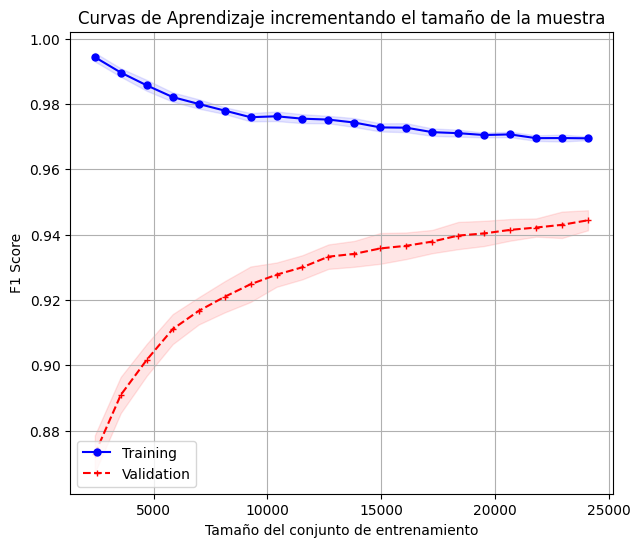

Feature total_distance_used_sum: 0.37074410915374756
Feature total_fuel_used_sum: 0.3218033015727997
Feature CurrentFuelPrice: 0.307452529668808


In [279]:
XGC_model(X_train_new, 5)

# **Conclusión XGBoost**

- El uso del clasificador XGBoost en nuestro análisis ha demostrado ser una elección acertada para establecer un modelo base sólido. XGBoost es reconocido por su eficiencia y alto rendimiento en tareas de clasificación, especialmente cuando se trabaja con conjuntos de datos grandes y complejos.

Al implementarlo como nuestro modelo baseline, hemos aprovechado varias ventajas clave:

- Alto rendimiento predictivo: Gracias a su capacidad para manejar interacciones complejas entre variables y su enfoque en minimizar errores, XGBoost suele superar a otros algoritmos en precisión.

- Manejo eficiente de datos faltantes: El algoritmo es robusto frente a valores faltantes, lo que reduce la necesidad de preprocesamiento intensivo y permite un flujo de trabajo más ágil.

- Regularización incorporada: Incluye técnicas de regularización que previenen el sobreajuste, mejorando así la capacidad de generalización del modelo.

- Velocidad y escalabilidad: Su arquitectura optimizada permite un entrenamiento rápido incluso con grandes volúmenes de datos, lo que es esencial para iterar y mejorar modelos con eficiencia.

- La elección de XGBoost como modelo baseline nos proporciona una referencia sólida y confiable para comparar y evaluar futuros modelos. Esto asegura que cualquier mejora en el rendimiento se deba a avances significativos en la modelización y no a limitaciones del modelo inicial. Además, establece un estándar elevado que fomenta la búsqueda continua de soluciones innovadoras y eficaces en nuestro proyecto.